In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

boston = datasets.load_boston()
X = boston.data
y = boston.target

/Users/mux/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing 

In [3]:
X.shape

(506, 13)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

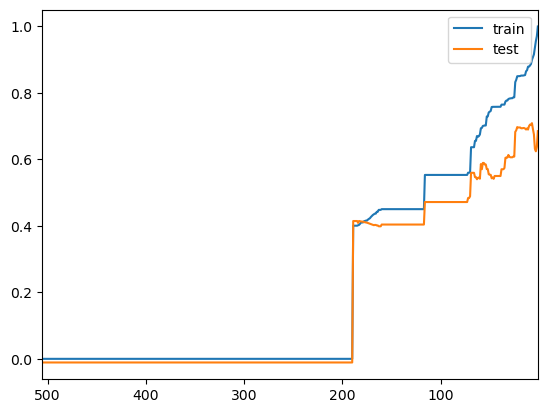

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

maxSampleLeaf = 506
train_scores = []
test_scores = []
for i in range(1, maxSampleLeaf+1):
    dt_reg = DecisionTreeRegressor(min_samples_leaf=i)
    dt_reg.fit(X_train, y_train)
    y_train_predict = dt_reg.predict(X_train)
    train_scores.append(r2_score(y_train, y_train_predict))
    test_scores.append(dt_reg.score(X_test, y_test))
    
plt.plot([i for i in range(1, maxSampleLeaf+1)], train_scores, label="train")
plt.plot([i for i in range(1, maxSampleLeaf+1)], test_scores, label="test")
plt.xlim(506, 1)
plt.legend()
plt.show()

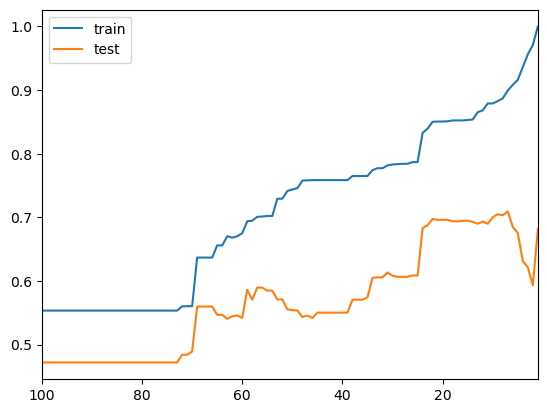

In [6]:
maxSampleLeaf = 100
train_scores = []
test_scores = []
for i in range(1, maxSampleLeaf+1):
    dt_reg = DecisionTreeRegressor(min_samples_leaf=i)
    dt_reg.fit(X_train, y_train)
    y_train_predict = dt_reg.predict(X_train)
    train_scores.append(r2_score(y_train, y_train_predict))
    test_scores.append(dt_reg.score(X_test, y_test))
    
plt.plot([i for i in range(1, maxSampleLeaf+1)], train_scores, label="train")
plt.plot([i for i in range(1, maxSampleLeaf+1)], test_scores, label="test")
plt.xlim(maxSampleLeaf, 1)
plt.legend()
plt.show()

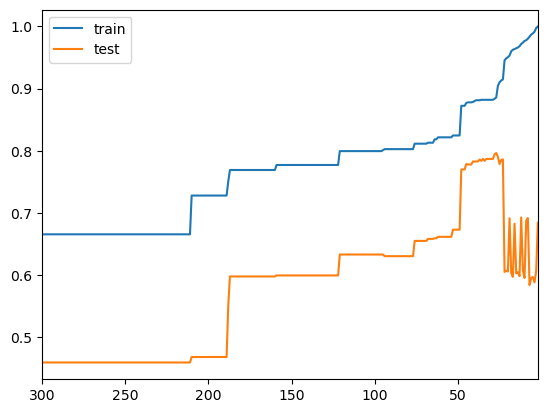

In [7]:
maxSamplesSplit = 300
train_scores = []
test_scores = []
for i in range(2, maxSamplesSplit+1):
    dt_reg = DecisionTreeRegressor(min_samples_split=i)
    dt_reg.fit(X_train, y_train)
    y_train_predict = dt_reg.predict(X_train)
    train_scores.append(r2_score(y_train, y_train_predict))
    test_scores.append(dt_reg.score(X_test, y_test))
    
plt.plot([i for i in range(2, maxSamplesSplit+1)], train_scores, label="train")
plt.plot([i for i in range(2, maxSamplesSplit+1)], test_scores, label="test")
plt.xlim(maxSamplesSplit, 2)
plt.legend()
plt.show()